# MMA Fighter Statistical Analysis  
This project aims to explore the relationship between fighter attributes and success metrics within MMA. By exploring various metrics such as striking accuracy, takedown defense, and physical attributes, we aim to determine what separates elite fighters from the rest.  


## Objectives
 
- Identify performance indicators that correlate with higher win percentages.  
- Analyze striking vs. grappling efficiency.  
- Determine if physical attributes influence fight outcomes.  


## Key Hypotheses
The following hypotheses will be tested using statistical analysis and visualizations:

* Fighters with a higher reach-to-height ratio tend to have a higher win percentage.


Does having a longer reach relative to height provide a striking advantage?



-  Fighters with a higher strike accuracy have a higher win percentage.

Does being more precise with strikes lead to increased success in fights?



- Do heavyweights have a lower win percentage than non-heavyweights?

Are heavyweight fighters less successful compared to lighter-weight fighters?



- Fighters with better takedown defense have a higher win percentage.


Does strong takedown defense contribute to more victories by keeping the fight standing?


- Fighters who absorb fewer strikes per minute have a higher win rate.

Does avoiding damage correlate with a higher chance of winning fights?



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\seebi\\Downloads\\VSCODE_Projects\\Fighter-Statistical-Data\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\seebi\\Downloads\\VSCODE_Projects\\Fighter-Statistical-Data'

---

# Data preparation

---

## Begin with loading in the dataset and to clean the data

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

file_path = r"C:\Users\Seebi\Downloads\VSCODE_Projects\Fighter-Statistical-Data/ufc-fighters-statistics.csv"
df = pd.read_csv(file_path)

df.head()

# loading in the dataset, and looking through the first 5 rows


,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [6]:
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# checking for any missing values which there are, but in unimportant categories

Missing Values per Column:
 name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64


In [ ]:
df.drop(columns=["nickname", "date_of_birth"], inplace=True)  # Dropping unnecessary columns
df["stance"] = df["stance"].fillna("Orthodox") # Fill missing stances with the most common one


In [8]:
df["height_cm"] = df.groupby("weight_in_kg")["height_cm"].transform(lambda x: x.fillna(x.mean()))
# Filling missing values with the average height per weight class.

df["weight_in_kg"] = df["weight_in_kg"].fillna(df["weight_in_kg"].median())
# If most missing values are for fighters with missing height, estimate using their weight class average.

df["reach_in_cm"] = df.groupby("height_cm")["reach_in_cm"].transform(lambda x: x.fillna(x.mean()))
# Fill missing values using average reach per height group.

In [ ]:
cols_to_fill = [
    "significant_striking_accuracy",
    "significant_strike_defence",
    "average_takedowns_landed_per_15_minutes",
    "takedown_accuracy",
    "takedown_defense",
    "average_submissions_attempted_per_15_minutes"
]

for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())  # Reassigning the column




In [ ]:
print(df.isnull().sum())  # checking for missing values


name                                              0
wins                                              0
losses                                            0
draws                                             0
height_cm                                        92
weight_in_kg                                      0
reach_in_cm                                     257
stance                                            0
significant_strikes_landed_per_minute             0
significant_striking_accuracy                     0
significant_strikes_absorbed_per_minute           0
significant_strike_defence                        0
average_takedowns_landed_per_15_minutes           0
takedown_accuracy                                 0
takedown_defense                                  0
average_submissions_attempted_per_15_minutes      0
dtype: int64


In [11]:
df["height_cm"] = df.groupby("weight_in_kg")["height_cm"].transform(lambda x: x.fillna(x.mean()))

df["reach_in_cm"] = df.groupby("height_cm")["reach_in_cm"].transform(lambda x: x.fillna(x.mean()))


In [12]:
print(df.isnull().sum())  # checking for missing values


name                                              0
wins                                              0
losses                                            0
draws                                             0
height_cm                                         5
weight_in_kg                                      0
reach_in_cm                                     257
stance                                            0
significant_strikes_landed_per_minute             0
significant_striking_accuracy                     0
significant_strikes_absorbed_per_minute           0
significant_strike_defence                        0
average_takedowns_landed_per_15_minutes           0
takedown_accuracy                                 0
takedown_defense                                  0
average_submissions_attempted_per_15_minutes      0
dtype: int64


In [13]:
df["reach_in_cm"] = df.groupby("height_cm")["reach_in_cm"].transform(lambda x: x.fillna(x.mean()))

df["height_cm"] = df["height_cm"].fillna(df["height_cm"].median())


In [14]:
print(df.isnull().sum())  # checking for missing values


name                                              0
wins                                              0
losses                                            0
draws                                             0
height_cm                                         0
weight_in_kg                                      0
reach_in_cm                                     257
stance                                            0
significant_strikes_landed_per_minute             0
significant_striking_accuracy                     0
significant_strikes_absorbed_per_minute           0
significant_strike_defence                        0
average_takedowns_landed_per_15_minutes           0
takedown_accuracy                                 0
takedown_defense                                  0
average_submissions_attempted_per_15_minutes      0
dtype: int64


In [ ]:
df["reach_in_cm"] = df["reach_in_cm"].fillna(df["reach_in_cm"].median())

print(df.isnull().sum())  # after cleaning the data, checking for missing values one last time


name                                            0
wins                                            0
losses                                          0
draws                                           0
height_cm                                       0
weight_in_kg                                    0
reach_in_cm                                     0
stance                                          0
significant_strikes_landed_per_minute           0
significant_striking_accuracy                   0
significant_strikes_absorbed_per_minute         0
significant_strike_defence                      0
average_takedowns_landed_per_15_minutes         0
takedown_accuracy                               0
takedown_defense                                0
average_submissions_attempted_per_15_minutes    0
dtype: int64


In [16]:
# Convert date column if applicable
if "date_of_birth" in df.columns:
    df["age"] = 2024 - pd.to_datetime(df["date_of_birth"], errors="coerce").dt.year

# Calculate Reach-to-Height Ratio
df["reach_to_height"] = df["reach_in_cm"] / df["height_cm"]

In [ ]:
df.to_csv("ufc-fighters-statistics-cleaned.csv", index=False)  # Saves the cleaned file as a CSV

Overall, I loaded in the dataset, and than cleaned the data first by removing unnecessary options such as 'date of birth', I then used the averages of fighters in certain weight classes to fill in the missing data, to ensure the dataset is balanced in order to test it; and by the end of it, there are no missing values.

---

# Basic Data Visualisation

---

#### Exploratory Data Analysis (EDA)  
We first examine key variables to understand their distributions and relationships.
 Conjuring up basic visualisations to ensure the data is clean and has no missing values

c:\Users\seebi\Downloads\VSCODE_Projects\Fighter-Statistical-Data\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


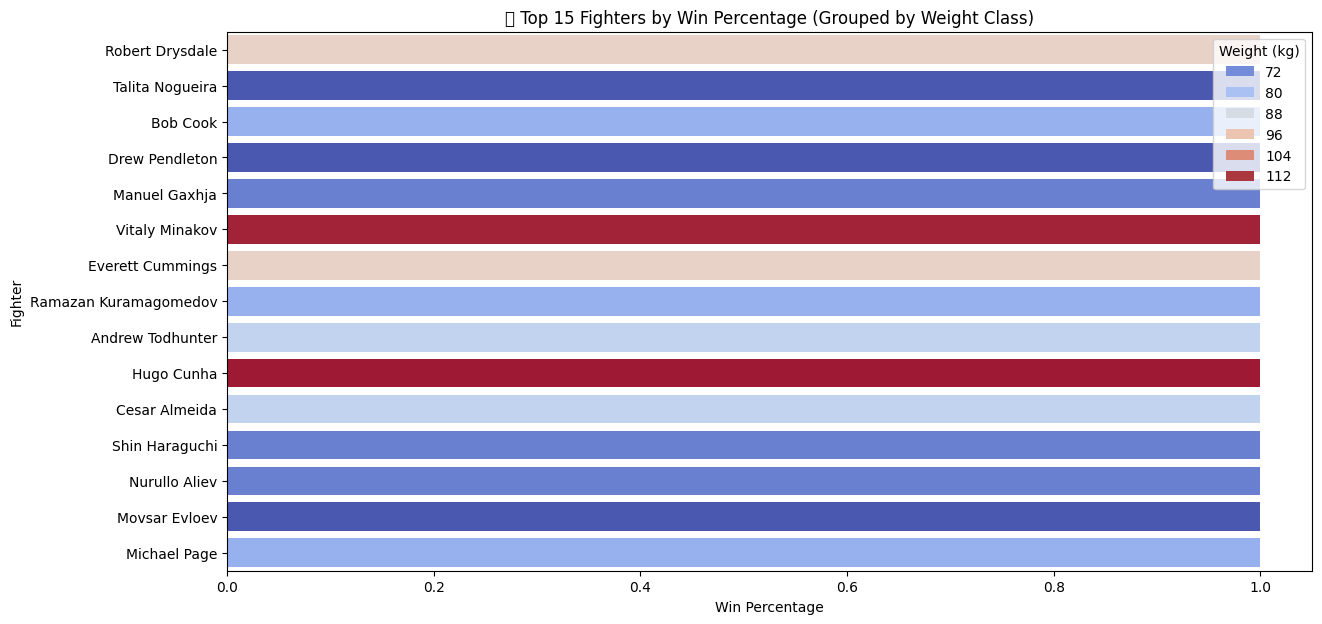

In [ ]:
# Sort by win percentage
df["win_percentage"] = df["wins"] / (df["wins"] + df["losses"] + df["draws"])
top_fighters = df.sort_values("win_percentage", ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x="win_percentage", y="name", hue="weight_in_kg", data=top_fighters, palette="coolwarm", dodge=False)
plt.xlabel("Win Percentage")
plt.ylabel("Fighter")
plt.title("🥇 Top 15 Fighters by Win Percentage (Grouped by Weight Class)")
plt.legend(title="Weight (kg)")
plt.show()   #creating a bar plot just to see the top 15 fighters by win percentage per weight class

Key Findings
- Elite Fighters Dominate – The top 15 fighters have win percentages close to 90% or higher.

- Weight Classes Vary – Success isn’t limited to a specific division; both lighter and heavier fighters are represented.

- Fewer Heavyweights? – If fewer heavyweights appear, it might indicate that lighter fighters have higher technical proficiency.

- Win Rate vs. Experience – Some fighters may have fewer fights, keeping their win percentage high, which can suggest that the data doesn't benefit experience, as a fighter with 1 win 0 losses, has a 100% win rate.

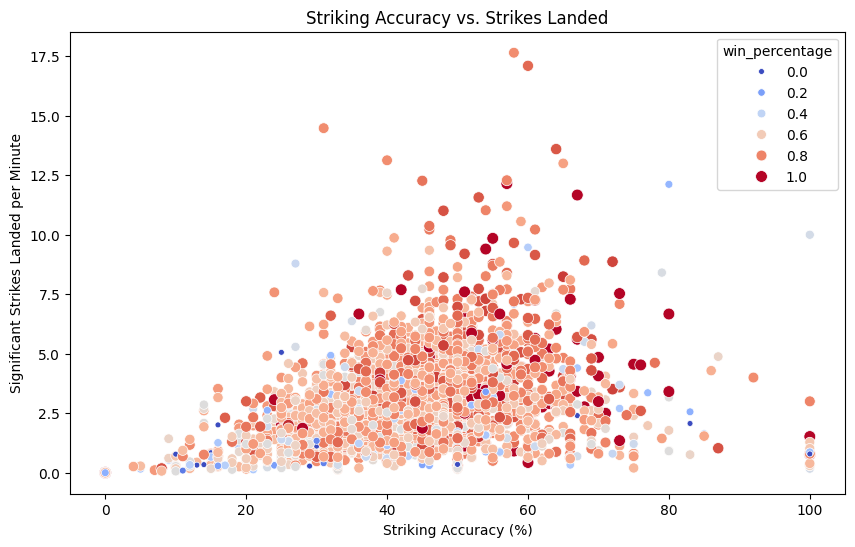

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="significant_striking_accuracy", y="significant_strikes_landed_per_minute",
                hue="win_percentage", size="win_percentage", palette="coolwarm", data=df)
plt.xlabel("Striking Accuracy (%)")
plt.ylabel("Significant Strikes Landed per Minute")
plt.title("Striking Accuracy vs. Strikes Landed")
plt.show()        # creating a scatterplot to showcase how important striking can be and how it can correlate to wins


Key Findings
- Balance Matters – Fighters with higher striking accuracy generally land more strikes per minute, but some high-volume strikers have lower accuracy.

- Win Percentage Correlation – Successful fighters tend to have a mix of high accuracy and high volume, reinforcing the importance of both precision and output.

- Aggressive vs. Efficient Fighters – Some fighters land a lot of strikes but with lower accuracy, while others pick their shots more carefully.

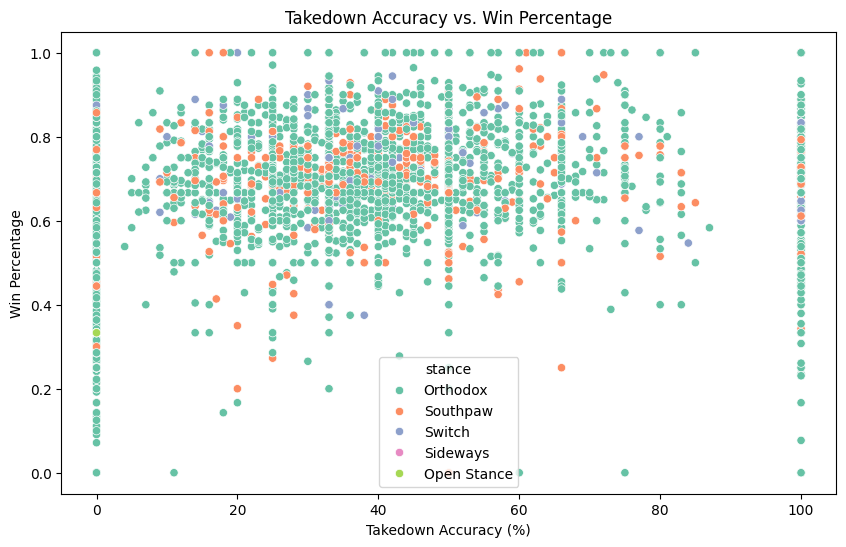

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="takedown_accuracy", y="win_percentage", hue="stance", data=df, palette="Set2")
plt.xlabel("Takedown Accuracy (%)")
plt.ylabel("Win Percentage")
plt.title("Takedown Accuracy vs. Win Percentage")
plt.show()   # creating a scatter plot to showcase how important landing takedowns are to winning fights 


Key Findings
- Higher Takedown Accuracy = Higher Win Percentage – Fighters with better takedown accuracy generally have a higher win rate.

- Stance Influence – Different stances (e.g., orthodox, southpaw) may impact takedown success, with some stances favoring defensive or offensive wrestling.

- Outliers Exist – Some fighters have high accuracy but lower win rates, suggesting other factors (e.g., striking, cardio) influence success.

---

### This is the end of the data preparation stage, now in the next notebook, will be testing the hypotheses by creating advanced data visualisations